In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


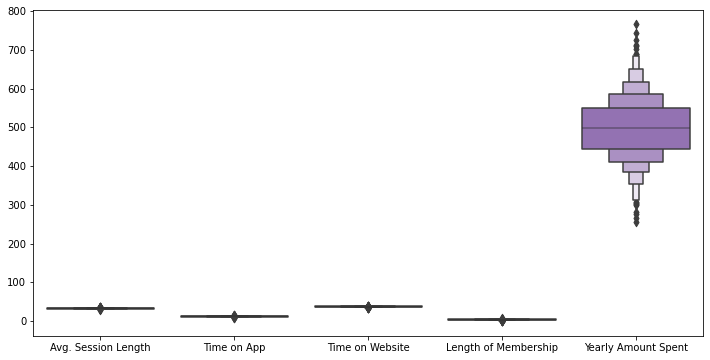

In [8]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=data);

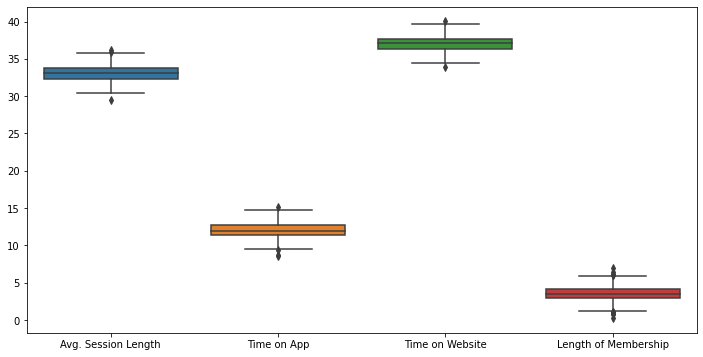

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :-1]);  # 모든 행의 마지막 열을 제외하고 출력

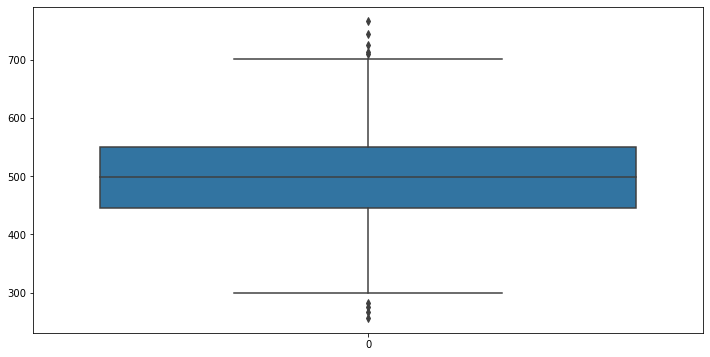

In [11]:
#Label 값에 대한 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['Yearly Amount Spent']);

<Figure size 864x432 with 0 Axes>

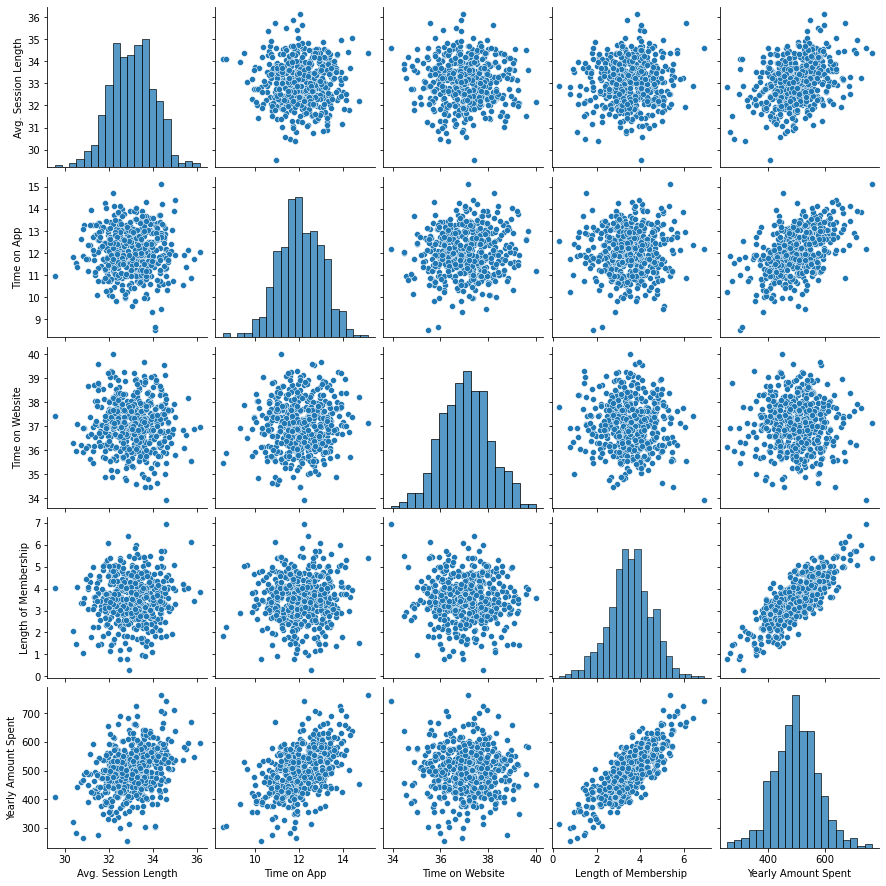

In [12]:
# pairplot으로 경향 확인 
plt.figure(figsize=(12, 6))
sns.pairplot(data=data);

<Figure size 864x432 with 0 Axes>

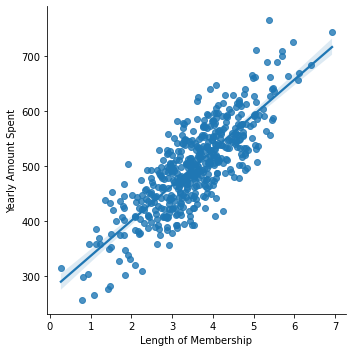

In [13]:
plt.figure(figsize=(12, 6))
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=data);

In [14]:
# 상관이 높은 멤버쉽 유지기간만 가지고 통계적 회귀
import statsmodels.api as sm

X = data["Length of Membership"]
y =  data["Yearly Amount Spent"]
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Thu, 21 Apr 2022   Prob (F-statistic):                        0.00
Time:                         13:47:01   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

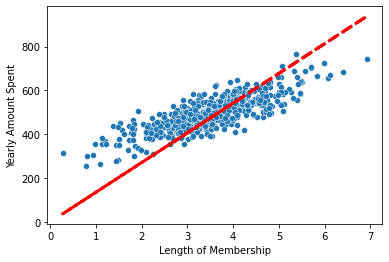

In [16]:
# 회귀모델 
pred = lm.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='dashed', lw=3)

(0.0, 765.5184619388373, 0.0, 765.5184619388373)

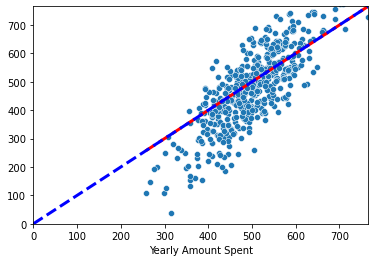

In [18]:
# 상수항이 없다. 
sns.scatterplot(x=y, y=pred) # 참값과 x값
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed', lw=3);
plt.plot([0, max(y)], [0, max(y)], 'b', ls='dashed', lw=3);
plt.axis([0, max(y), 0, max(y)])

In [19]:
X = np.c_[X, [1]*len(X)]  # 1을 X의 길이만큼 만든 후 X의 열로 추가
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [20]:
# x1과 const 추가됨
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Thu, 21 Apr 2022   Prob (F-statistic):          4.81e-117
Time:                         14:00:59   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-Squared: 평균을 기준으로 한 데이터의 예측과 실제값의 편차

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

In [22]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Thu, 21 Apr 2022   Prob (F-statistic):                        0.00
Time:                         14:06:14   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

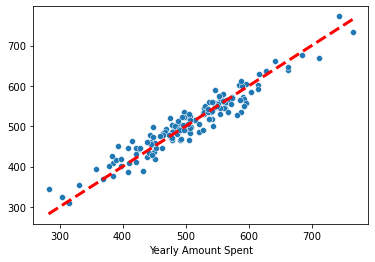

In [23]:
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred) # 참값 vs. 예측값
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3);